In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import exp

# HAHA Logsitics

Ok sooo, I just learned linear legression. What the heck is logistic regression and what is the difference.

Simply put, linear regression tries to fit **a line** which outputs the predictions as floats.

But logistic regression is used for predicting categorical values and classification stuff. Like, is this picture a dog or a cat? What kind of fruit is this?

The output is still a float value but we have to round it somehow so that it becomes the categorical value (int).

The simplest form of the output would be binary classification. Only two kind of things to predict.

In [103]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(return_X_y=True)
x, y = data[0], data[1][:100].reshape(1, -1)
x = x[:, 0][:100].reshape(1, -1)

In [104]:
x.shape, y.shape

((1, 100), (1, 100))

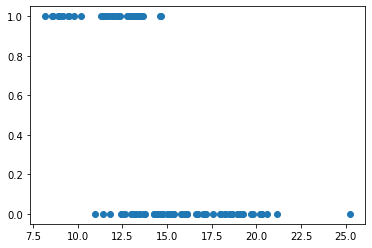

In [105]:
plt.scatter(x, y);

Looks different right? Because it is meant to be different.

What we need now is a function. Not just any function. **The Logistic Function**. Here it is:

$$
Y = \frac{1}{1 + e^-X}
$$

X and Y are not the data.

**Note:** This is the simplest form of the logistic function. Check out wikipedia for more information.

You might say "Hold up! You said the prediction values are categorical; Now you're giving me this weird function which I know for sure the output isn't 0 or 1. What's happening?"

To that I will say, "Patience, child."

Ok, back to work. Let's see what does this function do to $[-10, 10)$.

In [5]:
logistic_function = lambda x: 1 / (1 + exp(-x))

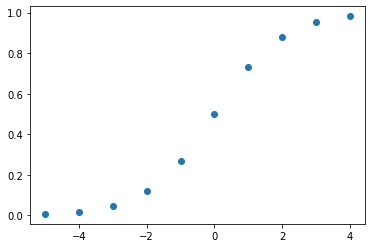

In [102]:
temp_x = [i for i in range(-5, 5)]
temp_y = [logistic_function(i) for i in temp_x]
plt.scatter(temp_x, temp_y);

The model that we will be using isn't just this function. There is more.

Like linear regression, we define a function to generate output based on the input. We will be using the same $Y = mX + b$ function.

After we passed our $X$ to the linear function, we need to calculate the **probability of the input belonging to a class**. Like how near is this output to class 0 or how near is it to class 1?

For this, we use the logistic function. $Y$ is passed to the function and an output between $[0, 1]$ is given. Then we determine a limit (usually 0.5) and say, "If output > 0.5 then it belongs to class 0. Otherwise, it belongs to class 1".

So the completed function would become this:

$$
p(class = 1) = [(\frac{1}{1 + e^{-(mX + b)}}) > 0.5] \\
p(class = 0) = [(\frac{1}{1 + e^{-(mX + b)}}) < 0.5]
$$

As in linear regression, we have to define a function that we want to either minimize or maximize and do the "predict, calculate new (better) coefficients" again and again until we reach some bottleneck or our model is good enough (i.e. accuracy is higher than the desired value).

So now we need to define a cost function. As before, without telling you why, let's consider this function as our $Cost$ function (not $Error$):

$$
Cost(\hat Y, Y) = \begin{cases}
-log(\hat Y), & \text{if $Y = 1$}.\\
-log(1 - \hat Y), & \text{if $Y = 0$}.
\end{cases}
$$

**Note:** For the updating and stuff, we delete don't consider the boundary and our $Y$ is the the function mentioned first in the notebook.

Like linear, we want to minimize this. Let's simplify this a bit:

$$
Cost(\hat Y, Y) = -Y\log (\hat Y) - (1 - Y)\log(1 - \hat Y)
$$

**Exercise:** Why this function? YOU should find out why folks.

This time we can't just **find** the best value to $\hat Y$ because the fucntion is **non-convex** and we can't just jump to the minimum and each time, we are trying to find the local minima. In each iteration, we add a value to the variables a.k.a **update** the variables until, like in linear, we reach a bottleneck or our model's accuract is good enough.

Now there are various methods to solve this unconstrained optimization problem such as the 1st order method **gradient descent** that requires the gradient of the logistic regression cost function, or a 2nd order method such as **Newton’s method** that requires the **gradient** and the **Hessian** of the logistic regression cost function.

Here, we want to use **gradient descent** which is defined as follows (for a dummy variable like m):

$$
m \mathrel{-}= \alpha \frac{\partial}{\partial m} Cost(\hat Y, Y)
$$

$\alpha$ is called **learning rate** and it is manually determined at the beginning or the program or at the start of each iteration.

For the sake of simplification, we split the derivation into three parts and use the chain rule to calculate the derivation (for variable m):

$$
\frac {\partial Cost}{\partial m} = \frac{\partial Cost}{\partial \hat Y} \ast \frac{\partial \hat Y}{\partial z} \ast \frac{\partial z}{\partial m}
$$

$$
\hat Y = \frac{1}{1 + e^{-z}}
$$

$$
z = mX + b
$$

**Exercise:** Calculate the derivation for both $m$ and $b$.

In [106]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [107]:
def predict(m, x, b):
    z = m * x + b
    yhat = sigmoid(z)
    return yhat

In [108]:
def cost(yhat, y):
    first = -y * np.log(yhat)
    second = (y - 1) * np.log(1 - yhat)
    return np.sum(first + second)

In [109]:
def optimize(m, x, b, y):
    n = x.shape[1]
    
    # prediction
    yhat = predict(m, x, b)
    predict(m, x, b)
    cst = cost(yhat, y) / n
    
    # gradient descent
    dm = np.dot(x, (yhat - y).T) / n
    db = np.sum(yhat - y) / n
    
    return dm, db, cst

In [110]:
def model_train(m, x, b, y, alpha=0.01, epochs=10):
    costs = []
    for i in range(epochs):
        dm, db, cost = optimize(m, x, b, y)
        
        m -= (alpha * dm)
        b -= (alpha * db)
        
        costs.append(cost)
        
    return m, b, costs

In [111]:
m, b, costs = model_train(0, x, 0, y)
m = m[0][0]
b = b

In [112]:
m, x, b, costs

(-0.061982807651724946,
 array([[17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
         13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
         14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
         16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 , 18.63 , 11.84 ,
         17.02 , 19.27 , 16.13 , 16.74 , 14.25 , 13.03 , 14.99 , 13.48 ,
         13.44 , 10.95 , 19.07 , 13.28 , 13.17 , 18.65 ,  8.196, 13.17 ,
         12.05 , 13.49 , 11.76 , 13.64 , 11.94 , 18.22 , 15.1  , 11.52 ,
         19.21 , 14.71 , 13.05 ,  8.618, 10.17 ,  8.598, 14.25 ,  9.173,
         12.68 , 14.78 ,  9.465, 11.31 ,  9.029, 12.78 , 18.94 ,  8.888,
         17.2  , 13.8  , 12.31 , 16.07 , 13.53 , 18.05 , 20.18 , 12.86 ,
         11.45 , 13.34 , 25.22 , 19.1  , 12.   , 18.46 , 14.48 , 19.02 ,
         12.36 , 14.64 , 14.62 , 15.37 , 13.27 , 13.45 , 15.06 , 20.26 ,
         12.18 ,  9.787, 11.6  , 14.42 ]]),
 0.002117504002833874,
 [0.6931471805599453,
  0.6170704

In [113]:
def limit(yhat):
    return (yhat >= 0.3).astype(np.int)

In [114]:
from sklearn.metrics import accuracy_score

y_pred = limit(predict(m, x, b))

print("The accuracy is: " + str(accuracy_score(y_pred[0], y[0])))

The accuracy is: 0.86


In [100]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression().fit(x[0].reshape(-1, 1), y[0])

y_pred = reg.predict(x[0].reshape(-1, 1))

print("The accuracy is: " + str(accuracy_score(y_pred, y[0])))

The accuracy is: 0.83
